# libraries

In [1]:
import os
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D
import matplotlib.pyplot as plt
import librosa
from PIL import Image
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , LeakyReLU
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU

# dataset from kaggle

In [22]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# !kaggle competitions download -c iris
!kaggle datasets download -d uciml/iris


Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 7.33MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('dogvscats/train')
zip_ref.close()

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogvscats/train/test1.zip', 'r')
zip_ref.extractall('dogvscats/test')
zip_ref.close()

import zipfile
zip_ref = zipfile.ZipFile('/content/dogvscats/train/train.zip', 'r')
zip_ref.extractall('dogvscats/train')
zip_ref.close()

# addresses

In [6]:
a=os.listdir('/content/dogvscats/train/train')

# convert img to nparray

In [7]:
data=[]
label=[]
e=0
for i in range(0,1000):#len(a)):
  img=Image.open('/content/dogvscats/train/train/'+a[i])
  img=img.resize((250,250))
  img=np.array(img)
  data.append(img)
  if a[i][0:3] == 'dog':
    label.append(0)
  else: label.append(1)
print('finish')

finish


# save and load data

In [ ]:
#np.save('/content/drive/MyDrive/having fun with data s/dogs vs cats/dogcats.npy',data)
np.save('/content/drive/MyDrive/having fun with data s/dogs vs cats/dogcatslabel.npy',label)

In [ ]:
#data=np.load('/content/drive/MyDrive/having fun with data s/dogs vs cats/dogcats.npy')
label=np.load('/content/drive/MyDrive/having fun with data s/dogs vs cats/dogcatslabel.npy')


# one hot data

In [8]:
data=np.asarray(data)
label=np.asarray(label)
label=keras.utils.to_categorical(label,num_classes=2)

print(data.shape,label.shape)

(1000, 250, 250, 3) (1000, 2)


In [9]:
cat , dog =0 ,0
for item in label:
  if item[0]==0:
    cat+=1
  else:
    dog+=1

print(cat,dog)

475 525


# train test split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data, label, test_size=0.2, random_state=42)
print(X_train.shape)

(800, 250, 250, 3)


# model

In [14]:
model = Sequential()
model.add(Conv2D(128, [5,5], strides = [2,2], padding = 'SAME', input_shape=(250,250,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(256, [5,5], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(256, [1,1], padding = 'SAME'))
model.add(Conv2D(256, [3,3], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(512, [1,1], padding = 'SAME'))
model.add(Conv2D(512, [3,3], padding = 'SAME',activation = 'relu'))
model.add(Conv2D(512, [1,1], padding = 'SAME'))
model.add(Conv2D(512, [3,3], padding = 'SAME', activation = 'relu'))
model.add(MaxPool2D(padding = 'SAME'))
model.add(Flatten())

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

opt = optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer =  opt , loss = 'categorical_crossentropy', metrics = ['acc'])

In [15]:
history=model.fit(X_train, y_train ,batch_size=8,epochs=100 ,validation_data=(X_test,y_test))

Epoch 1/100
100/100 [==============================] - 19s 85ms/step - loss: 2.5129 - acc: 0.5412 - val_loss: 0.6826 - val_acc: 0.5300
Epoch 2/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6976 - acc: 0.5437 - val_loss: 0.6940 - val_acc: 0.5150
Epoch 3/100
100/100 [==============================] - 8s 83ms/step - loss: 0.6985 - acc: 0.5725 - val_loss: 0.7018 - val_acc: 0.4900
Epoch 4/100
100/100 [==============================] - 8s 81ms/step - loss: 0.6789 - acc: 0.5825 - val_loss: 0.6913 - val_acc: 0.5350
Epoch 5/100
100/100 [==============================] - 8s 83ms/step - loss: 0.6715 - acc: 0.5713 - val_loss: 0.6597 - val_acc: 0.5750
Epoch 6/100
100/100 [==============================] - 8s 84ms/step - loss: 0.6680 - acc: 0.5950 - val_loss: 0.6704 - val_acc: 0.5950
Epoch 7/100
100/100 [==============================] - 8s 83ms/step - loss: 0.6725 - acc: 0.6012 - val_loss: 0.6873 - val_acc: 0.5650
Epoch 8/100
100/100 [==============================] - 8s 83m

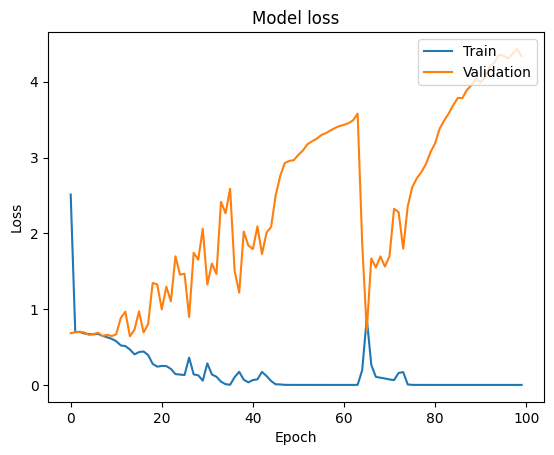

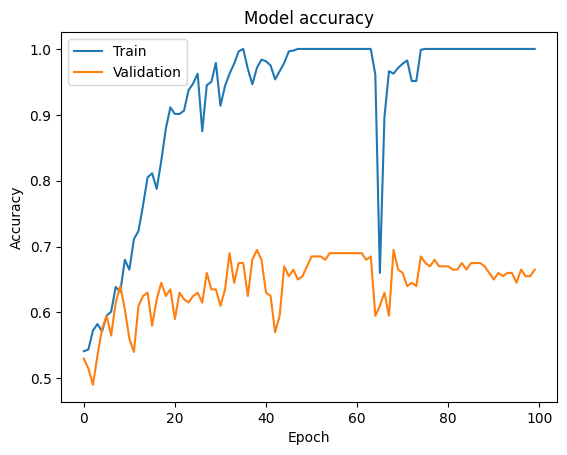

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot the loss and accuracy
plot_loss(history)
plot_accuracy(history)


7/7 [==============================] - 3s 36ms/step


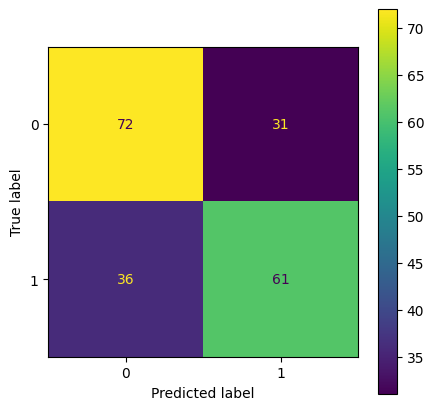

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred_probs = model.predict(X_test)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax)
plt.show()
